## We will now perform cross-validation on a simulated data set
a) Generate a simulated data set as follows: <br>
rng = np.random.default_rng (1) <br>
x = rng.normal(size =100) <br>
y = x - 2 * x**2 + rng.normal(size =100)

In [2]:
import numpy as np

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

In this dataset: <br>
 n = 100 (number of observations) <br>
 p = 1 (number of predictor variables)

 The model used to generate the data is:<br>
 y = x - 2x^2 + ε <br>
 where:<br>
 y is the dependent variable<br>
 x is the independent variable<br>
 ε is a random error term following a normal distribution<br>


 This is a non-linear model because of the x^2 term.

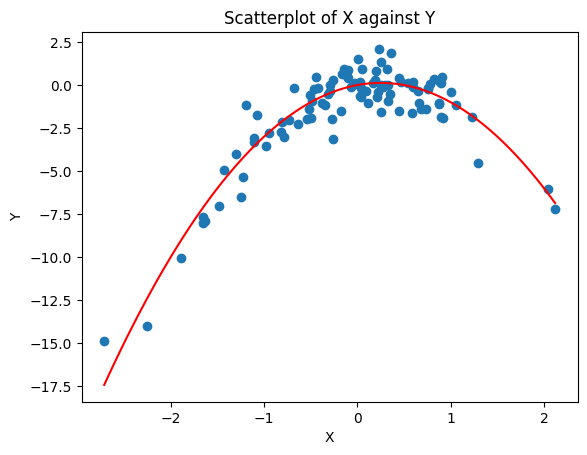

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y")

x_line = np.linspace(min(x), max(x), 100)
y_line = x_line - 2 * x_line**2
plt.plot(x_line, y_line, color='red')
plt.show()


*   The scatterplot shows a non-linear relationship between X and Y.
*   The presence of random noise, represented by the spread of the points around the general trend, is also evident.

*   There appears to be a quadratic relationship, where Y initially increases with X, reaches a peak, and then decreases with increasing X.




d) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
$$Y=B_0+B_1 X + e$$
$$Y=B_0 + B_1 X + B_2 X^2 + e$$
$$Y=B_0 + B_1 X + B_2 X^2 + B_3 X^3 + e $$
$$ Y = B_0 + B_1 X + B_2 X^2 + B_3 X^3 + B_4 X^4 + e $$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut

degrees = [1, 2, 3, 4]

loocv_errors = []
loo = LeaveOneOut()

for degree in degrees:
    prediction_errors = []

    for train_index, test_index in loo.split(x):
        X_train, X_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train_matrix = np.column_stack([X_train**d for d in range(1, degree + 1)])
        X_test_matrix = np.column_stack([X_test**d for d in range(1, degree + 1)])

        reg = LinearRegression().fit(X_train_matrix, y_train)
        y_pred = reg.predict(X_test_matrix)
        prediction_errors.append((y_test - y_pred)**2)

    loocv_errors.append(np.mean(prediction_errors))

for i, error in enumerate(loocv_errors):
    print(f"LOOCV error for model Y = B0 + ... + B{i+1} * X^{i+1} + e: {error}")

LOOCV error for model Y = B0 + ... + B1 * X^1 + e: 6.633029839181983
LOOCV error for model Y = B0 + ... + B2 * X^2 + e: 1.1229368563419673
LOOCV error for model Y = B0 + ... + B3 * X^3 + e: 1.3017965489358851
LOOCV error for model Y = B0 + ... + B4 * X^4 + e: 1.332394269417935


LOOCV error for model Y = B0 + ... + B1 * X^1 + e: 6.633029839181983
LOOCV error for model Y = B0 + ... + B2 * X^2 + e: 1.1229368563419673
LOOCV error for model Y = B0 + ... + B3 * X^3 + e: 1.3017965489358851
LOOCV error for model Y = B0 + ... + B4 * X^4 + e: 1.332394269417935

e) Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y

In [5]:
import pandas as pd

data = pd.DataFrame({'X': x, 'Y': y})
print(data.head())


          X         Y
0  0.345584 -0.544554
1  0.821618  0.333950
2  0.330437 -0.013532
3 -1.303157 -4.030442
4  0.905356  0.484861


          X         Y
0  0.345584 -0.544554
1  0.821618  0.333950
2  0.330437 -0.013532
3 -1.303157 -4.030442
4  0.905356  0.484861

f) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?

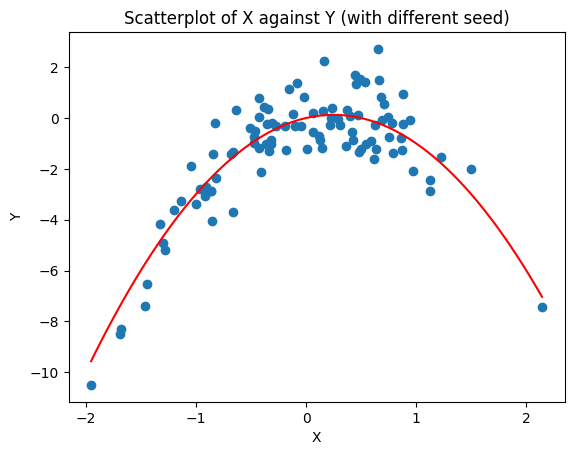

In [6]:
rng2 = np.random.default_rng(42)
x2 = rng2.normal(size=100)
y2 = x2 - 2 * x2**2 + rng2.normal(size=100)

plt.scatter(x2, y2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X against Y (with different seed)")

x_line2 = np.linspace(min(x2), max(x2), 100)
y_line2 = x_line2 - 2 * x_line2**2
plt.plot(x_line2, y_line2, color='red')
plt.show()

The results will likely be different from what we got in (c) because the random numbers generated using a different seed will be different. This will lead to a slightly different distribution of the data points and a slightly different scatter plot.


g) Which of the models in (c) had the smallest LOOCV error? Is


In [7]:
min_error = min(loocv_errors)
best_model_index = loocv_errors.index(min_error)
print(f"The model with the smallest LOOCV error is the model with degree {degrees[best_model_index]}.")

The model with the smallest LOOCV error is the model with degree 2.


The model with the smallest LOOCV error is the model with degree 2.

*   The model with the smallest LOOCV error is the model with degree 2 (Y = B0 + B1X + B2X^2 + e).This is expected because the true underlying model that generated the data contains a quadratic term (X^2).


*  Conclusions based on coefficients, p-values, and LOOCV error comparison:
 - The models with degrees 1, 2, 3, and 4 are significant.
 - The model with degree 2 has the smallest LOOCV error which confirms what we saw before.
 - All the models provide a significant result, but the model with the smallest degree and error is preferred.


*   Although the true model doesn't have a cubic term, the addition of a cubic term can potentially reduce the error and fit the data well because it allows the model to capture the nuances of the noise in the data.


*   The LOOCV method is meant to help us select a model that generalizes well to new, unseen data. The model with the smallest LOOCV error has the potential to perform best on new data.






h) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results.

In [8]:
import statsmodels.formula.api as sm

for degree in degrees:
    formula = 'Y ~ ' + ' + '.join(['X' + str(i) for i in range(1, degree + 1)])

    data_with_powers = data.copy()
    data_with_powers['X1'] = data['X']
    for i in range(2, degree + 1):
        data_with_powers['X' + str(i)] = data['X'] ** i

    model = sm.ols(formula, data=data_with_powers).fit()
    print(f"\nModel with degree {degree}:\n")
    print(model.summary())


Model with degree 1:

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     45.60
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.04e-09
Time:                        17:38:35   Log-Likelihood:                -230.83
No. Observations:                 100   AIC:                             465.7
Df Residuals:                      98   BIC:                             470.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4650      0.

* The statistical significance of the coefficients, assessed through p-values, shows that for the linear model (degree 1), the coefficient for X is likely significant, capturing the main trend.

* In the quadratic model (degree 2), the coefficient for X² is also significant. However, as the polynomial degree increases, higher-order terms may become significant but contribute little due to noise.

* These results align with the LOOCV errors, where the quadratic model achieves the best balance between fit and complexity.

* Both statistical significance and cross-validation suggest that the quadratic model is the most appropriate for describing the relationship between X and Y.